# Decision Tree - 업 샘플링

In [1]:
# 라이브러리 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/up_sampling.csv', encoding='utf-8')

In [3]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-04-21 18:00:00,5.5,12.7,1.1,1.7,1007.0,1.0
1,2018-08-17 07:00:00,10.6,15.2,0.7,1.1,1012.9,1.0
2,2018-06-10 12:00:00,6.5,15.2,0.8,1.2,1005.4,1.0
3,2018-05-20 12:00:00,10.7,18.8,0.8,1.1,1019.9,1.0
4,2015-11-25 09:00:00,6.4,13.3,0.9,1.4,1019.2,1.0
...,...,...,...,...,...,...,...
138971,2020-12-29 22:00:00,12.5,15.9,1.0,1.7,1013.4,0.0
138972,2020-12-29 23:00:00,13.3,17.3,1.1,1.6,1013.1,0.0
138973,2020-12-30 00:00:00,13.6,16.8,1.1,1.8,1013.5,0.0
138974,2020-12-30 01:00:00,12.3,15.8,1.1,1.8,1014.1,0.0


In [4]:
# index
df = df.set_index('일시')
df


,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2012-04-21 18:00:00,5.5,12.7,1.1,1.7,1007.0,1.0
2018-08-17 07:00:00,10.6,15.2,0.7,1.1,1012.9,1.0
2018-06-10 12:00:00,6.5,15.2,0.8,1.2,1005.4,1.0
2018-05-20 12:00:00,10.7,18.8,0.8,1.1,1019.9,1.0
2015-11-25 09:00:00,6.4,13.3,0.9,1.4,1019.2,1.0
...,...,...,...,...,...,...
2020-12-29 22:00:00,12.5,15.9,1.0,1.7,1013.4,0.0
2020-12-29 23:00:00,13.3,17.3,1.1,1.6,1013.1,0.0
2020-12-30 00:00:00,13.6,16.8,1.1,1.8,1013.5,0.0


In [5]:
# 데이터셋 구성
data = df[['WIND_SPEED', 'GUST_WIND', 'SIG_WAVE', 'MAX_WAVE','HPA']].to_numpy()
target = df['특보강도'].to_numpy()

In [6]:
# 훈련세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [7]:
# 훈련세트, 테스트 세트 크기
print(train_input.shape, test_input.shape)

(111180, 5) (27796, 5)


In [8]:
# StandardScaler 사용해서 훈련세트 전처리
# 같은 객체로 테스트 세트 변환
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8123313545601727
0.8120233127068643


In [10]:
# 로지스틱 회귀가 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[-0.29175923  1.52279807  4.53822073 -2.72716953 -0.01842217]] [0.33936431]


## 결정트리

In [11]:
# score() 메서드로 정확도 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트

0.9999640223061702
0.9794574758958123


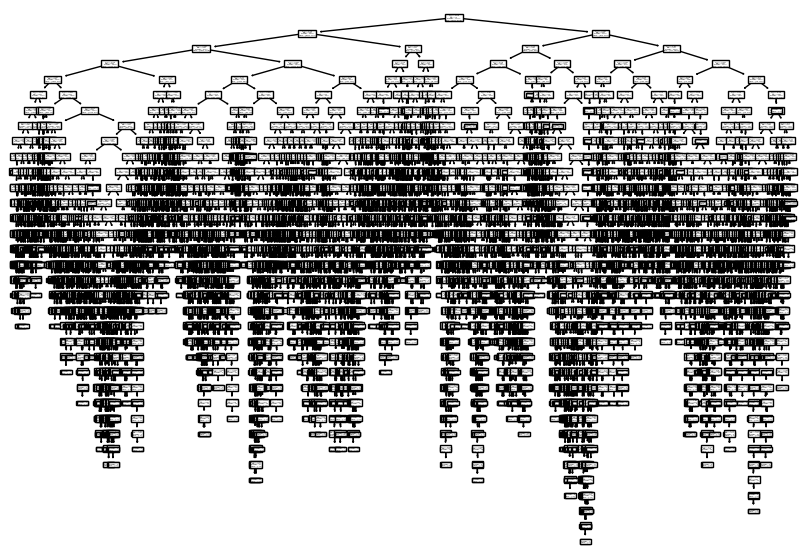

In [12]:
# plot_tree() 트리
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

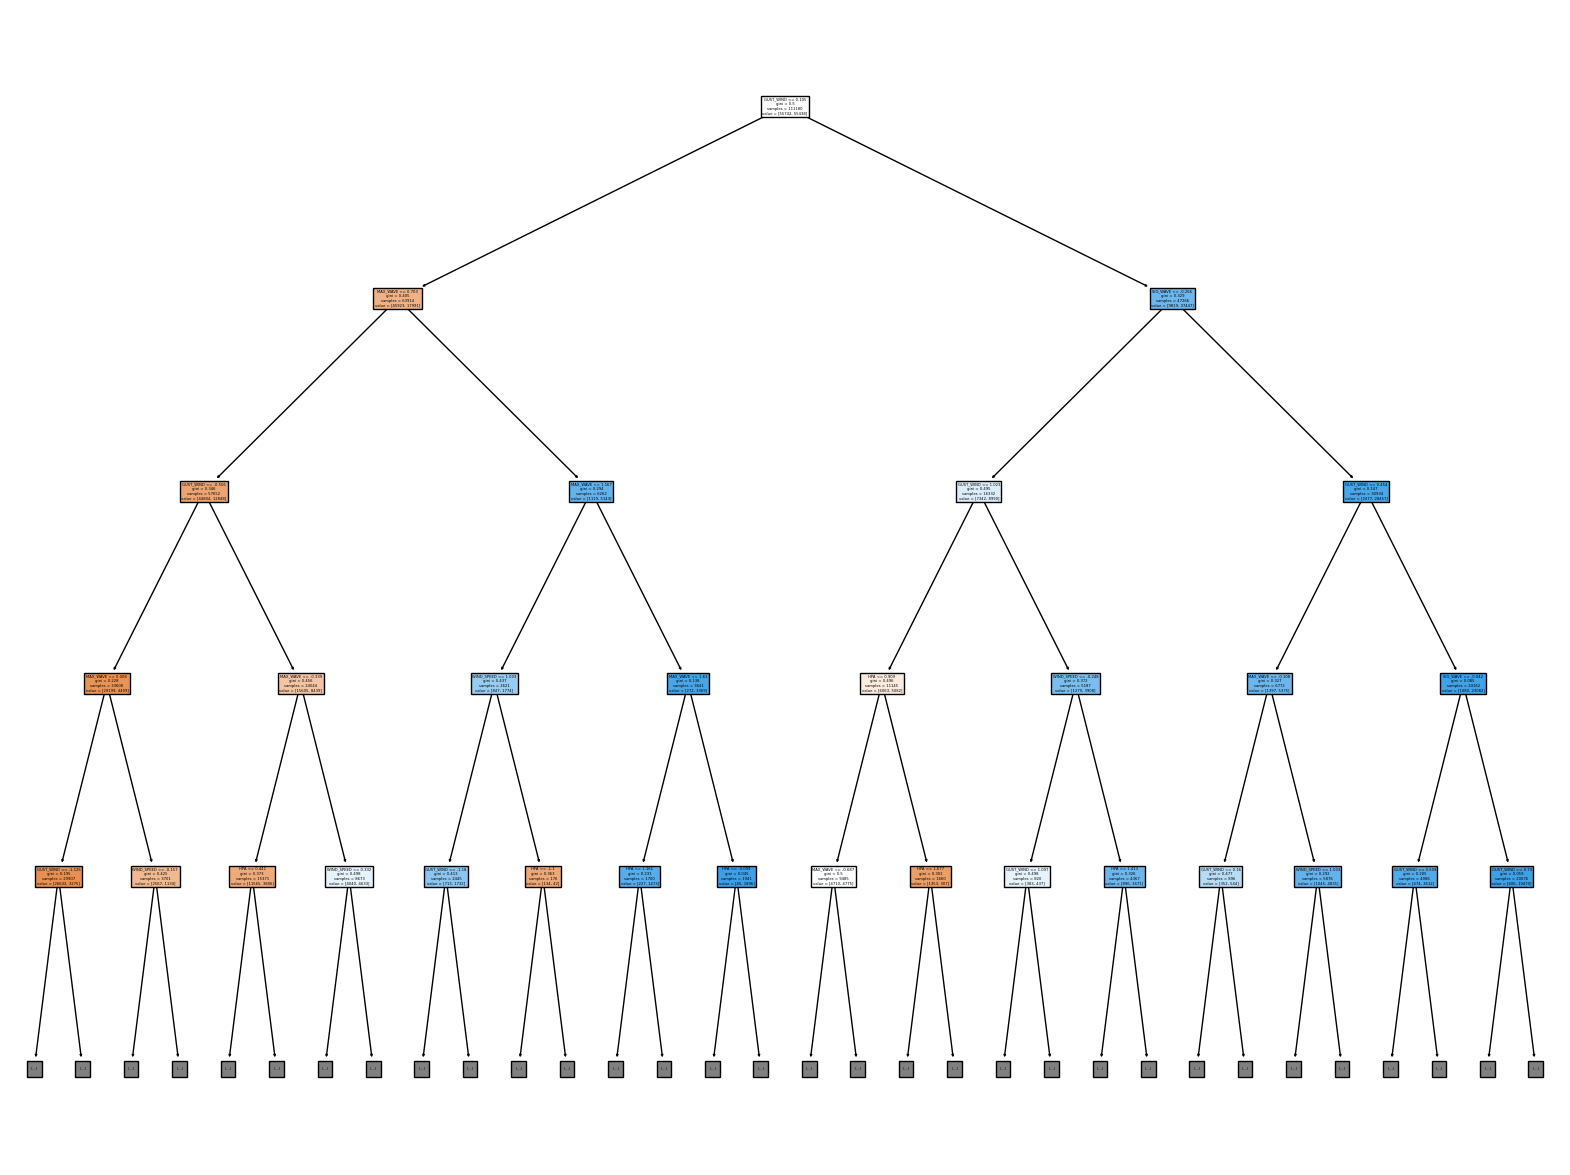

In [13]:
# 트리 깊이 제한
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=4, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [14]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.7948821730527074
0.7916606706000864


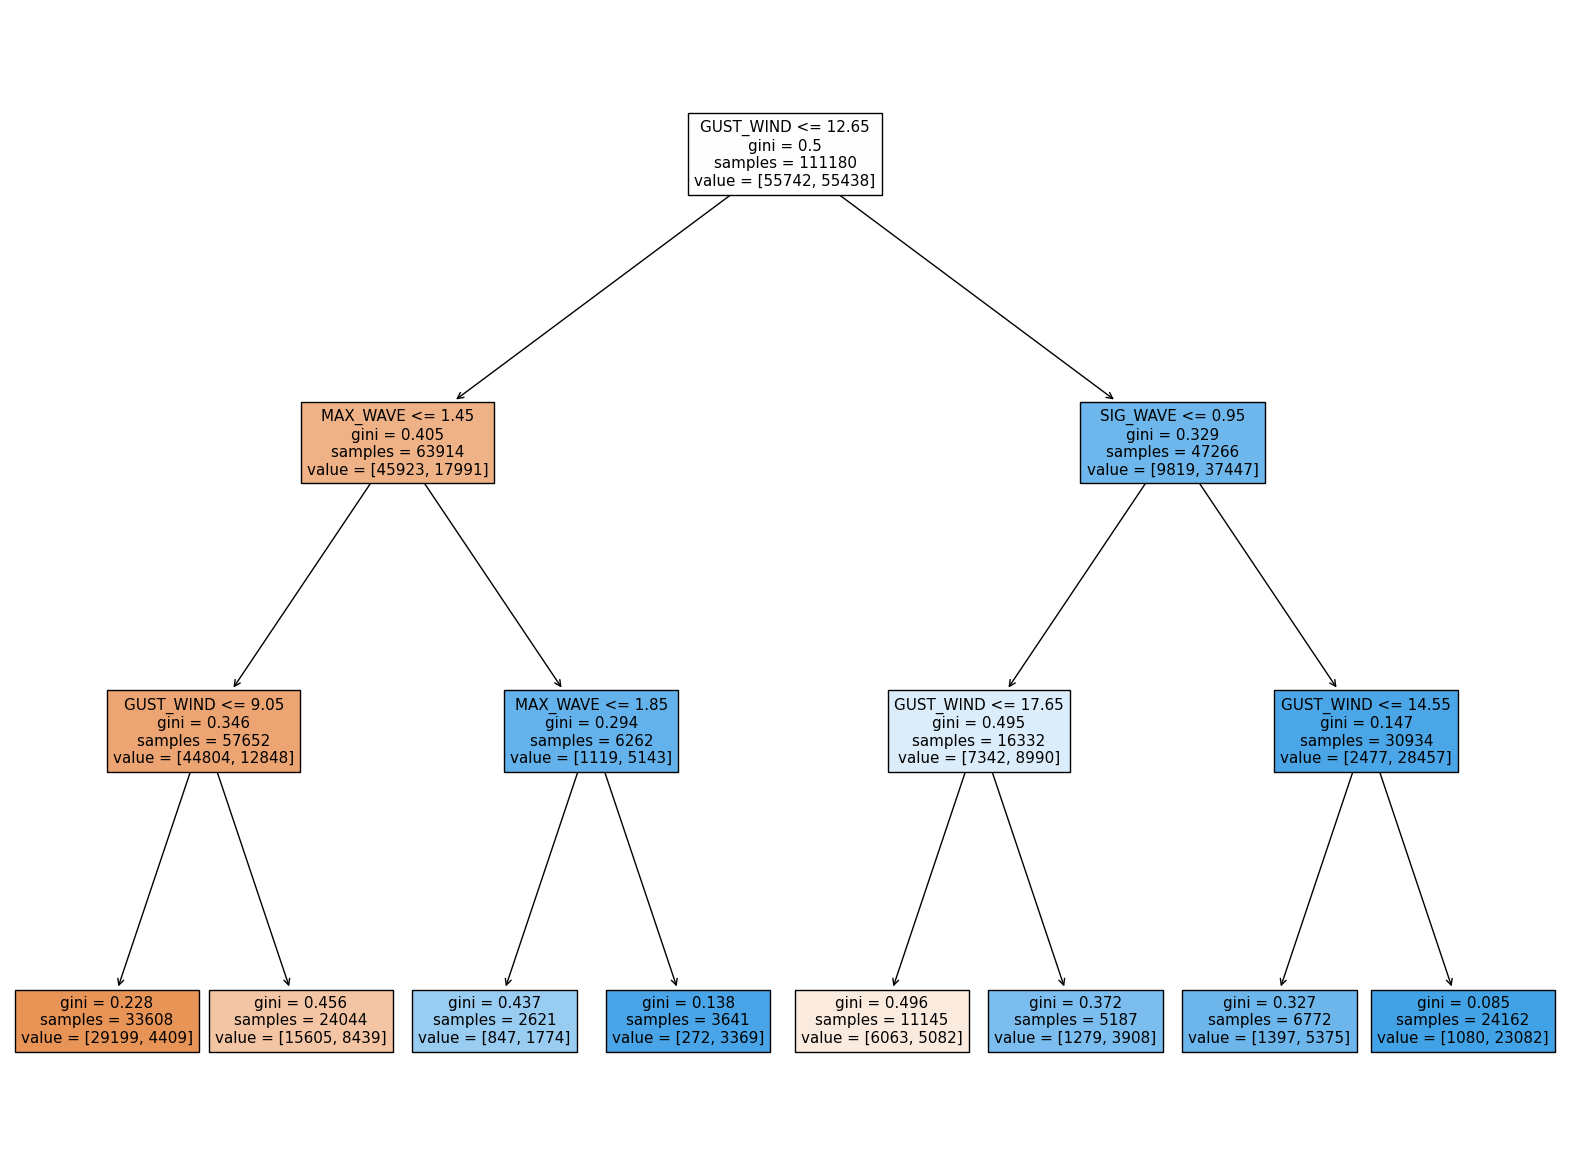

In [15]:
# plot tree()
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['WIND_SPEED','GUST_WIND','MAX_WAVE','SIG_WAVE','HPA'])
plt.show()

In [16]:
# 특성 중요도
print(dt.feature_importances_)

[0.         0.69676549 0.17951009 0.12372443 0.        ]
